<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Exercice2_Prediction_conforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Étape 1 : Régression médiane et régression linéaire avec tracé des courbes

(Intercept)          wt 
  34.232237   -4.539474

(Intercept)          wt 
  37.285126   -5.344472

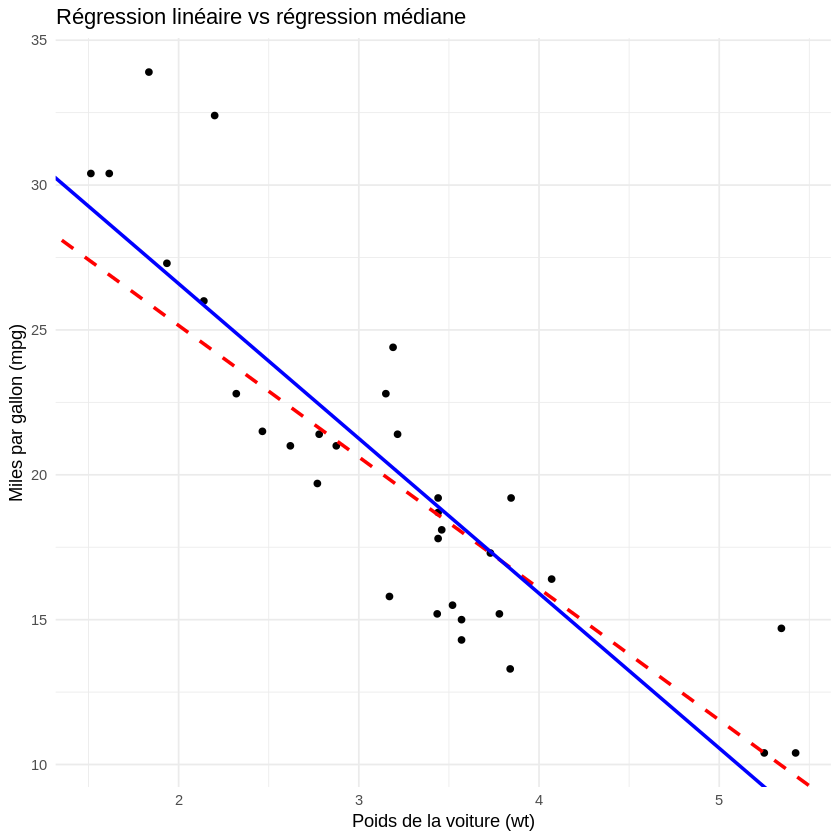

In [ ]:
# Installer le package nécessaire
#install.packages("quantreg")
library(quantreg)
library(ggplot2)

# Charger le jeu de données mtcars
data(mtcars)

# Appliquer la régression médiane (tau = 0.5)
fit_median <- rq(mpg ~ wt, data = mtcars, tau = 0.5)

# Appliquer la régression linéaire classique
fit_linear <- lm(mpg ~ wt, data = mtcars)

# Comparer les modèles avec un graphique
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +  # Nuage de points des données
  geom_abline(intercept = coef(fit_median)[1], slope = coef(fit_median)[2], color = "red", linetype = "dashed", size = 1) +
  geom_abline(intercept = coef(fit_linear)[1], slope = coef(fit_linear)[2], color = "blue", size = 1) +
  labs(title = "Régression linéaire vs régression médiane",
       x = "Poids de la voiture (wt)", y = "Miles par gallon (mpg)") +
  theme_minimal() +
  scale_color_manual(values = c("red", "blue")) +
  theme(legend.position = "bottom")

# Comparer les coefficients des deux modèles
coefficients(fit_median)
coefficients(fit_linear)

# Étape 2 : Ajouter des outliers et comparer

Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”



Call: rq(formula = mpg ~ wt, tau = 0.5, data = mtcars_outliers)

tau: [1] 0.5

Coefficients:
            coefficients lower bd upper bd
(Intercept) 37.64249     33.34331 40.56705
wt          -5.44041     -6.57824 -4.17886


Call:
lm(formula = mpg ~ wt, data = mtcars_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1966 -3.3148 -0.8178  2.1095 12.0412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.1352     2.0183   20.38  < 2e-16 ***
wt           -6.3529     0.5841  -10.88 6.25e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.888 on 30 degrees of freedom
Multiple R-squared:  0.7977,	Adjusted R-squared:  0.7909 
F-statistic: 118.3 on 1 and 30 DF,  p-value: 6.252e-12


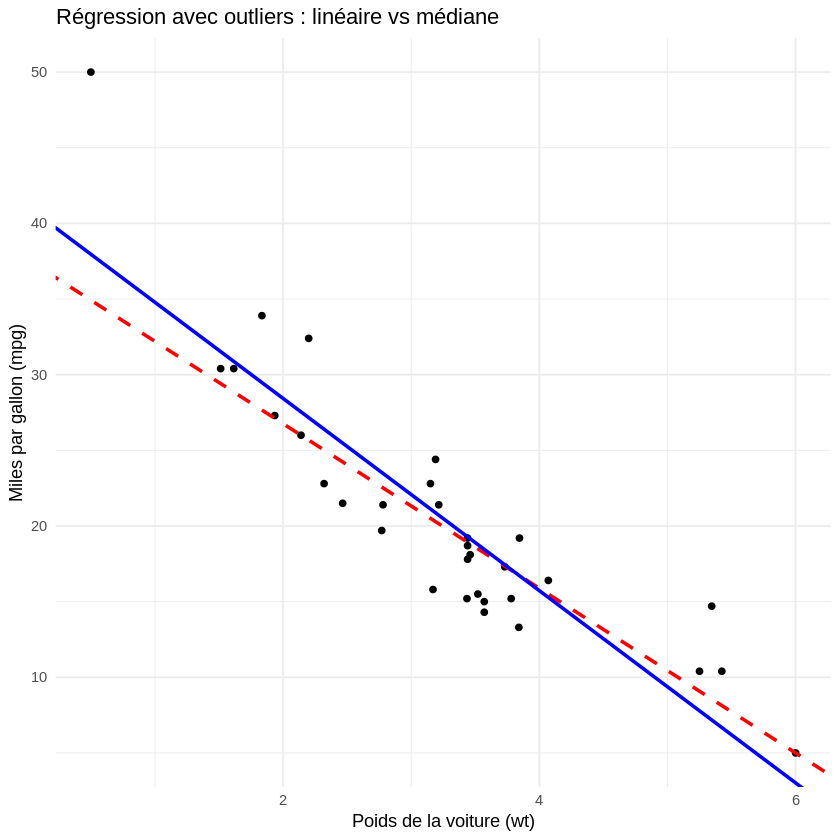

In [ ]:
# Ajouter des outliers aux données (par exemple, modifier quelques valeurs de wt et mpg)
mtcars_outliers <- mtcars
mtcars_outliers[c(1, 2), "mpg"] <- c(5, 50)  # Ajouter deux outliers aux miles per gallon
mtcars_outliers[c(1, 2), "wt"] <- c(6, 0.5)  # Ajouter des outliers pour le poids

# Réappliquer les régressions après ajout d'outliers
fit_median_outliers <- rq(mpg ~ wt, data = mtcars_outliers, tau = 0.5)
fit_linear_outliers <- lm(mpg ~ wt, data = mtcars_outliers)

# Comparer les modèles avec un graphique après ajout des outliers
ggplot(mtcars_outliers, aes(x = wt, y = mpg)) +
  geom_point() +  # Nuage de points des données avec outliers
  geom_abline(intercept = coef(fit_median_outliers)[1], slope = coef(fit_median_outliers)[2], color = "red", linetype = "dashed", size = 1) +
  geom_abline(intercept = coef(fit_linear_outliers)[1], slope = coef(fit_linear_outliers)[2], color = "blue", size = 1) +
  labs(title = "Régression avec outliers : linéaire vs médiane",
       x = "Poids de la voiture (wt)", y = "Miles par gallon (mpg)") +
  theme_minimal()

# Comparer les résultats après ajout d'outliers
summary(fit_median_outliers)
summary(fit_linear_outliers)

# Étape 3 : Réaliser la régression quantile pour différents $\tau$

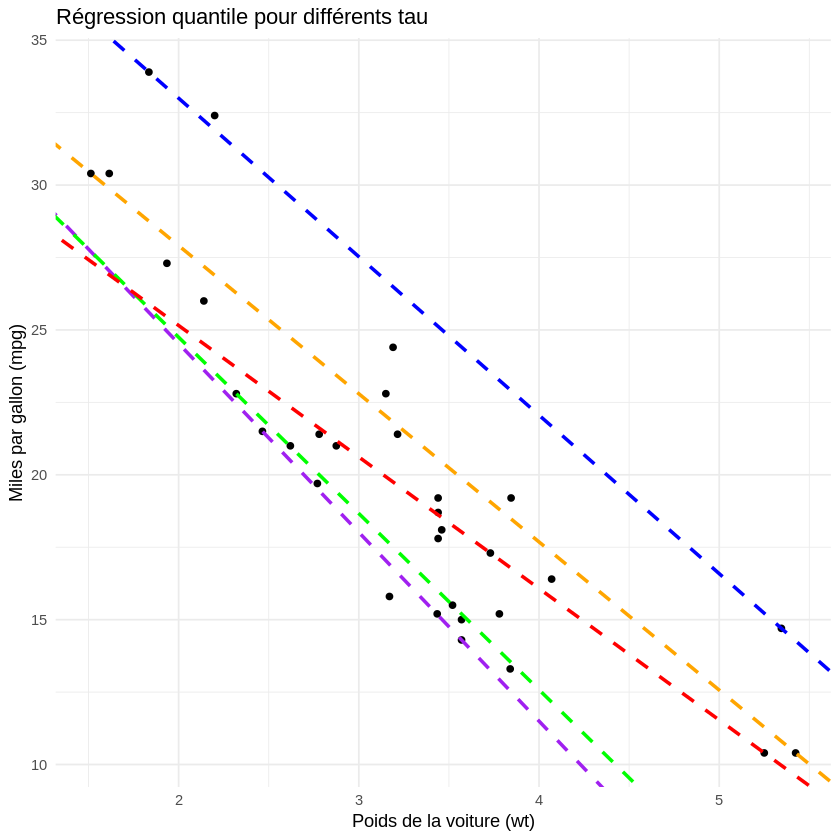

In [ ]:
# Appliquer des régressions quantiles pour différents tau
taus <- c(0.05, 0.25, 0.5, 0.75, 0.95)
fits_quantiles <- rq(mpg ~ wt, data = mtcars, tau = taus)

# Tracer les régressions quantiles sur un même graphique
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +  # Nuage de points des données
  geom_abline(intercept = coef(fits_quantiles)[1,1], slope = coef(fits_quantiles)[2,1], color = "purple", size = 1, linetype = "dashed") +  # Quantile 0.05
  geom_abline(intercept = coef(fits_quantiles)[1,2], slope = coef(fits_quantiles)[2,2], color = "green", size = 1, linetype = "dashed") +  # Quantile 0.25
  geom_abline(intercept = coef(fits_quantiles)[1,3], slope = coef(fits_quantiles)[2,3], color = "red", size = 1, linetype = "dashed") +    # Quantile 0.5 (médiane)
  geom_abline(intercept = coef(fits_quantiles)[1,4], slope = coef(fits_quantiles)[2,4], color = "orange", size = 1, linetype = "dashed") + # Quantile 0.75
  geom_abline(intercept = coef(fits_quantiles)[1,5], slope = coef(fits_quantiles)[2,5], color = "blue", size = 1, linetype = "dashed") +   # Quantile 0.95
  labs(title = "Régression quantile pour différents tau",
       x = "Poids de la voiture (wt)", y = "Miles par gallon (mpg)") +
  theme_minimal()


# Étape 4 : Quantifier la proportion de points en dehors des intervalles de quantiles

[1] 0.09375

[1] 0.5

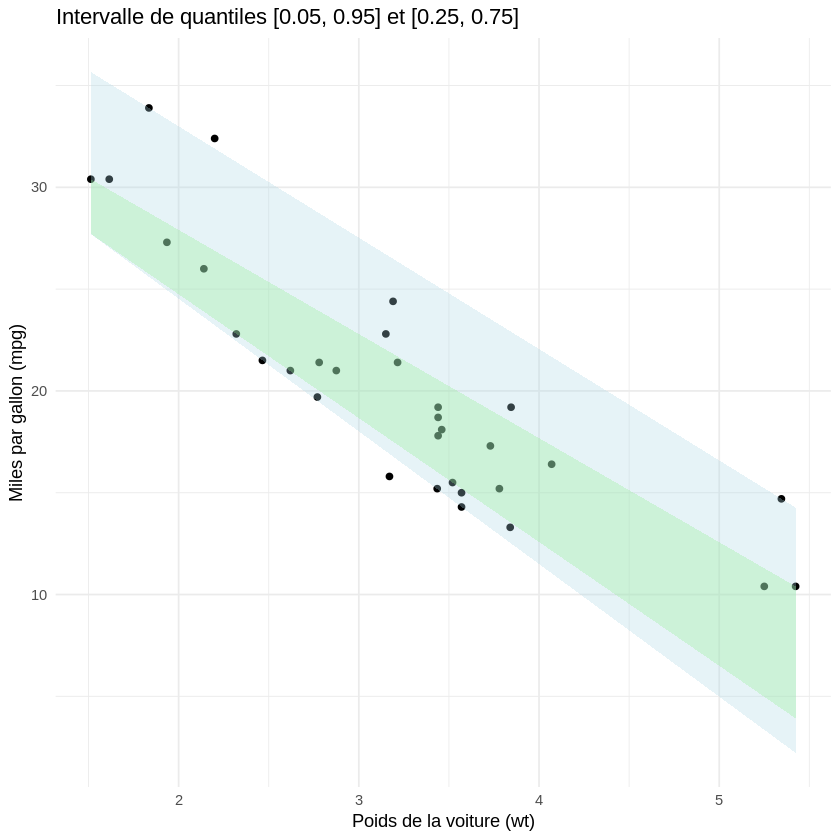

In [ ]:
# Prédire les valeurs des quantiles pour chaque point
predictions <- predict(fits_quantiles, newdata = mtcars)

# Quantifier les points en dehors de l'intervalle [0.05, 0.95]
outside_5_95 <- mtcars$mpg < predictions[, 1] | mtcars$mpg > predictions[, 5]
proportion_outside_5_95 <- mean(outside_5_95)

# Quantifier les points en dehors de l'intervalle [0.25, 0.75]
outside_25_75 <- mtcars$mpg < predictions[, 2] | mtcars$mpg > predictions[, 4]
proportion_outside_25_75 <- mean(outside_25_75)

# Afficher les proportions
proportion_outside_5_95
proportion_outside_25_75

# Tracer les intervalles de quantiles [0.05, 0.95] et [0.25, 0.75]
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +  # Nuage de points des données
  geom_ribbon(aes(ymin = predictions[, 1], ymax = predictions[, 5]), fill = "lightblue", alpha = 0.3) +  # Intervalle [0.05, 0.95]
  geom_ribbon(aes(ymin = predictions[, 2], ymax = predictions[, 4]), fill = "lightgreen", alpha = 0.3) + # Intervalle [0.25, 0.75]
  labs(title = "Intervalle de quantiles [0.05, 0.95] et [0.25, 0.75]",
       x = "Poids de la voiture (wt)", y = "Miles par gallon (mpg)") +
  theme_minimal()